<a href="https://colab.research.google.com/github/saamirkc/DeepLearning/blob/main/mnistclassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

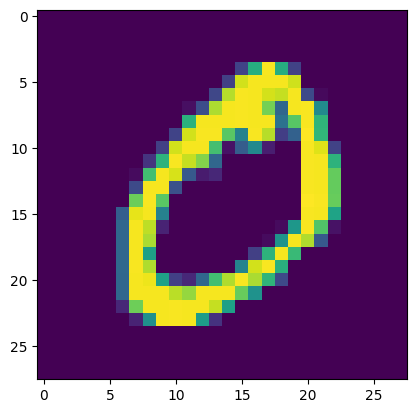

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam')

In [18]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.0394 - val_loss: 0.0888
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0294 - val_loss: 0.0899
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0223 - val_loss: 0.0887
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0192 - val_loss: 0.0883
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0155 - val_loss: 0.0983
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0131 - val_loss: 0.1066
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0117 - val_loss: 0.0938
Epoch 8/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0094 - val_loss: 0.1034
Epoch 9/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0080 - val_loss: 0.0969
Epoch 10/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.008

In [24]:
y_prob=model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [26]:
y_pred=y_prob.argmax(axis=1)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9771